In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import sklearn
from tensorflow import keras
from keras.layers import Dense

In [183]:
df = pd.read_csv("laptop_price.xls", sep=",", lineterminator="\n", low_memory=False, encoding='latin-1')

In [13]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros\r
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
from sklearn.linear_model import LinearRegression

In [14]:
n_lines, n_collumns = df.shape

In [15]:
n_lines

1303

In [16]:
n_collumns

13

In [184]:
X = df[df.columns[:-1]]

In [185]:
X = X.drop('laptop_ID', axis=1)
X = X.drop('Product', axis=1)

In [186]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
dtypes: float64(1), object(9)
memory usage: 101.9+ KB


In [33]:
y = df[df.columns[-1:]]

In [34]:
y.head()

,Price_euros\r
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [40]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Memory']) 

In [41]:
one_hot_encoded_data.head()

,laptop_ID,Inches,Weight,Price_euros\r,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,1,13.3,1.37kg,1339.69,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,13.3,1.34kg,898.94,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,15.6,1.86kg,575.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,15.4,1.83kg,2537.45,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,5,13.3,1.37kg,1803.60,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
def removeKG(a):
    b = ''
    itens = list(range(0, 10))
    itens = [str(x) for x in itens]
    itens.append('.')
    for item in a:
        if item in itens:
            b = b+item
    return b
a = X['Weight'].apply(removeKG)

In [84]:
a.head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: object

In [111]:
a = a.astype(float)

In [188]:
X.drop('Weight', axis=1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10


In [189]:
X = X.assign(Weight=a)

In [190]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37


In [191]:
b = X['Inches'].astype(float)
X.drop('Inches', axis=1)
X = X.assign(Inches=b)

In [192]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37


In [193]:
X = pd.get_dummies(X, columns = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram','Gpu', 'OpSys', 'Memory']) 

In [194]:
X.head()

,Inches,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,13.3,1.37,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,1.34,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,1.86,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,15.4,1.83,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,13.3,1.37,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
y = y.astype(float)
y.head()

,Price_euros\r
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [195]:
reg = LinearRegression().fit(X, y)

In [196]:
reg.predict(X.head())

array([[1366.78125],
       [ 874.75   ],
       [ 838.15625],
       [2543.46875],
       [1817.34375]])

In [197]:
import seaborn as sb

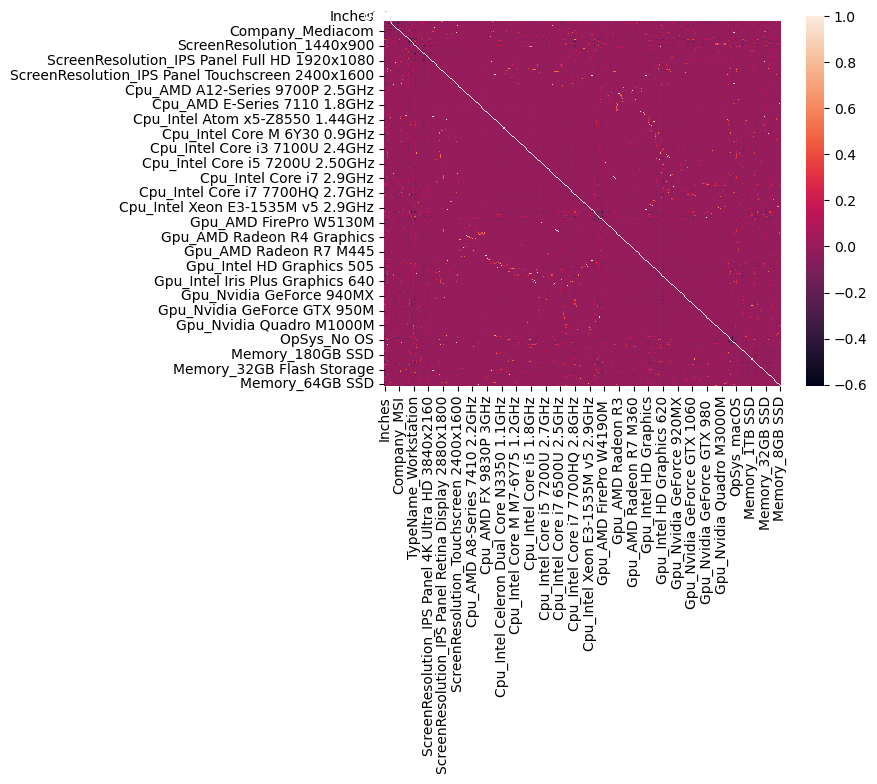

In [198]:
# plotting correlation heatmap 
dataplot = sb.heatmap(X.corr(), annot=True) 
  
# displaying heatmap 
mp.show() 

In [199]:
X.shape

(1303, 352)